# Atividade 03
---

### Sumário

- Preparação de Dados EEG:

Os dados EEG (eletroencefalografia) são coletados de uma fonte.

- Processamento Inicial:

Os dados EEG brutos são processados e filtrados para extrair informações úteis, como as frequências das ondas cerebrais.

- Análise de Dados:

Os dados processados são analisados para identificar as frequências das ondas cerebrais, como ondas alfa, beta, delta, etc.

Análise de Dados Cerebrais: Pode oferecer ferramentas ou algoritmos para analisar dados EEG e extrair informações significativas, como detecção de padrões, identificação de estados mentais, etc.


- Visualização de Dados:

para criar visualizações interativas dos dados EEG. O artigo menciona a criação de um gráfico de linha para representar as ondas cerebrais.

- Front END
    - Visualização de Gráficos de Ondas Cerebrais:

    Os gráficos de linha gerados pelo D3.js mostram as ondas cerebrais em diferentes frequências ao longo do tempo.
    - Interatividade:

    Os gráficos são interativos, permitindo aos usuários explorar os dados EEG de maneira dinâmica. Eles podem ampliar, deslocar e selecionar períodos específicos para análise detalhada.

- Exportação de Dados:

A aplicação permite exportar dados ou capturas de tela dos gráficos para análise posterior ou compartilhamento.

In [2]:
from Class.AnaliseSistaisSistemas import AnaliseSinaisESistemas
import heartpy as hp
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import mne

## Funcoes Basicas

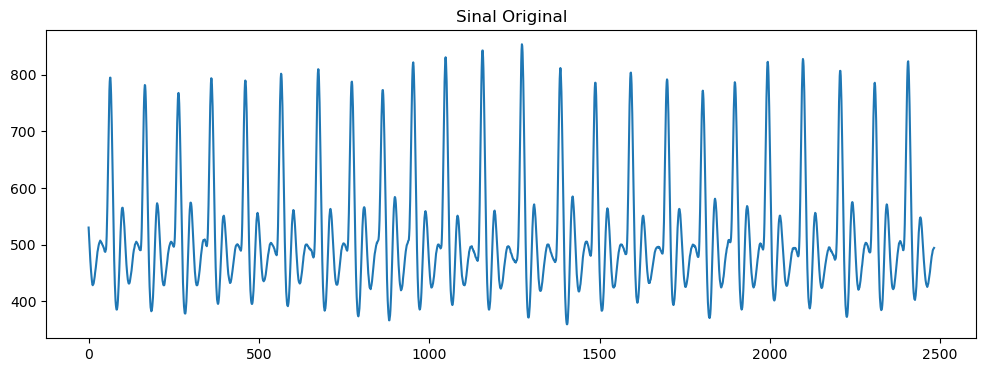

In [3]:


analise = AnaliseSinaisESistemas()
data, timer = analise.carregar_sinal(0)
data2, timer2 = analise.carregar_sinal(1)
analise.visualizationSignal(data, "Sinal Original")

## Analise Espectral

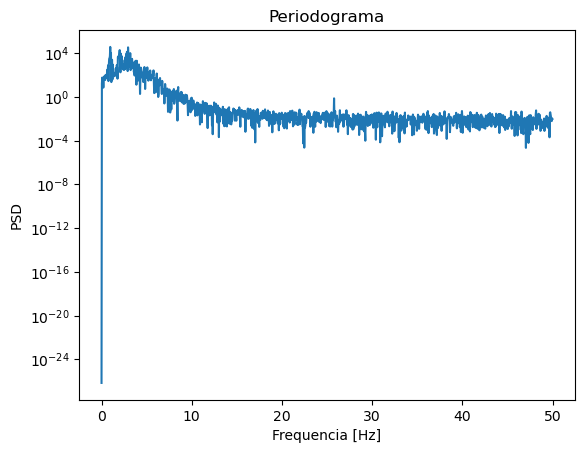

In [4]:
analise.calculaPeriodograma(data)

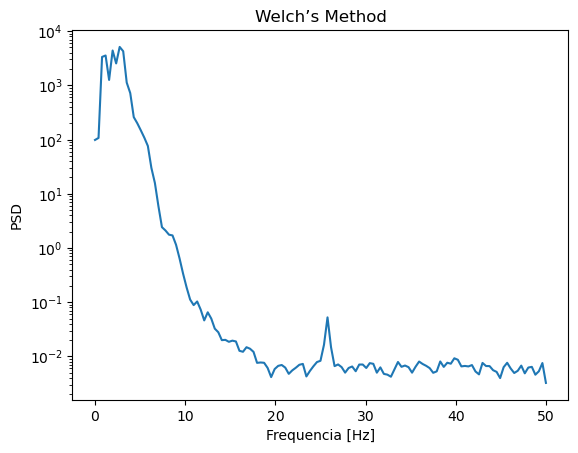

In [5]:
analise.calculaWelchMethod(data)

## Frequencias Cerebrais 

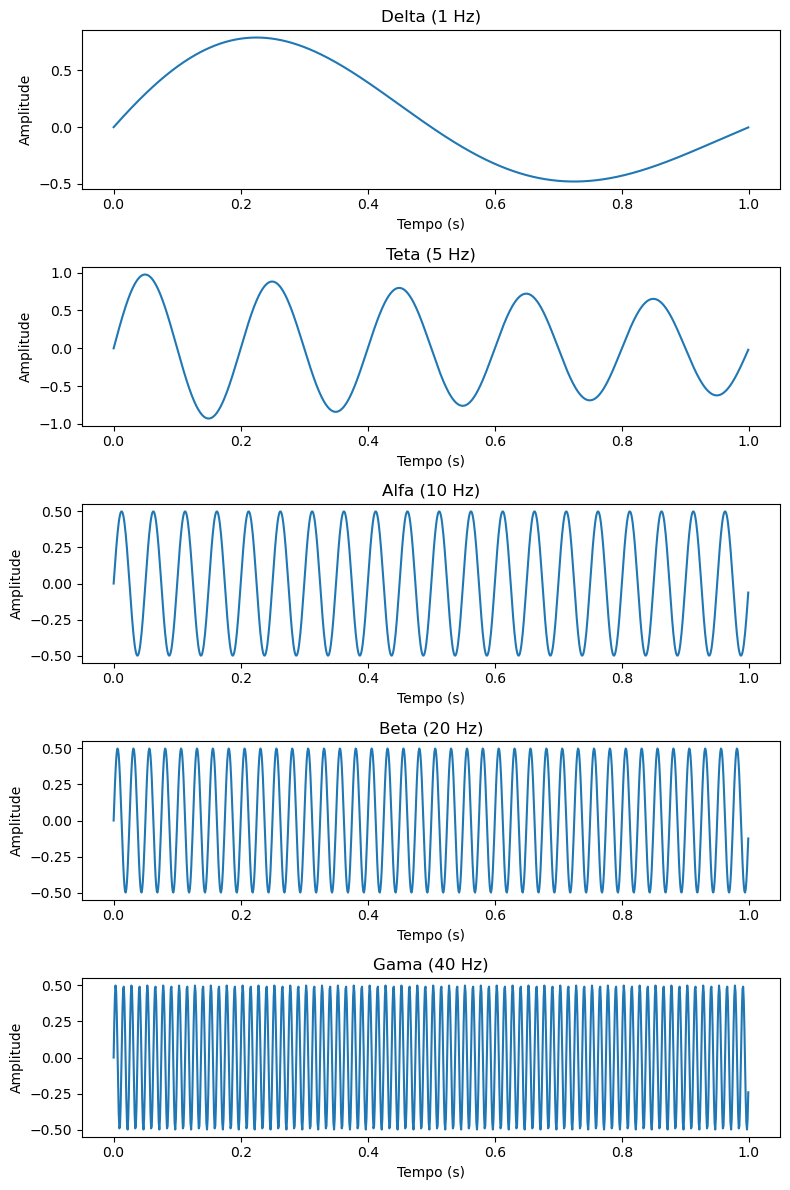

In [6]:

# Função para gerar uma onda com frequência e nome específicos
def gerar_onda(frequencia, nome):
    tempo = np.linspace(0, 1, 1000, endpoint=False)  # Tempo de 0 a 1 segundo
    if nome == 'Delta':
        onda = np.sin(2 * np.pi * frequencia * tempo) * np.exp(-tempo)
    elif nome == 'Teta':
        onda = np.sin(2 * np.pi * frequencia * tempo) * np.exp(-tempo / 2)
    elif nome == 'Alfa':
        onda = np.sin(2 * np.pi * frequencia * tempo) * np.cos(2 * np.pi * 10 * tempo)
    elif nome == 'Beta':
        onda = np.sin(2 * np.pi * frequencia * tempo) * np.cos(2 * np.pi * 20 * tempo)
    elif nome == 'Gama':
        onda = np.sin(2 * np.pi * frequencia * tempo) * np.cos(2 * np.pi * 40 * tempo)
    return tempo, onda

# Lista de frequências e nomes das ondas
frequencias = [1, 5, 10, 20, 40]
nomes = ['Delta', 'Teta', 'Alfa', 'Beta', 'Gama']

# Gerar e plotar as ondas
fig, axs = plt.subplots(5, figsize=(8, 12))
for i, (freq, nome) in enumerate(zip(frequencias, nomes)):
    tempo, onda = gerar_onda(freq, nome)
    axs[i].plot(tempo, onda)
    axs[i].set_title(f'{nome} ({freq} Hz)')
    axs[i].set_xlabel('Tempo (s)')
    axs[i].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()


## Processamento Digital

Os sinais EOG e EEG foram amostrados a 100 Hz. O sinal EMG submentoniano foi filtrado eletronicamente passa-alto, retificado e filtrado passa-baixo, após o que o envelope EMG resultante expresso em uV rms (raiz quadrada média) foi amostrado a 1 Hz. O fluxo de ar oronasal, a temperatura corporal retal e o marcador de evento também foram amostrados a 1Hz.


https://physionet.org/content/sleep-edfx/1.0.0/sleep-telemetry/#files-panel

Diferentes tipos de processamento
- FFT
- Potência da banda
- Probabilidade de sincronização
- Dimensões fractais Petrosian e Higuchi
- Parâmetros Hjorth
- Análise de Flutuação Detendida
- Entropia de Amostra
- Complexidade Lempel-Ziv
- Coeficiente de Correlação Cruzada

In [7]:
# Sinais de exemplo
x = np.array([1, 2, 3])
h = np.array([0.5, 1, 0.5])

In [8]:

diretorio = "./dataset sleep EEG/"  # Substitua pelo caminho desejado

arquivos_txt = analise.localizar_arquivos_txt(diretorio)
print("Arquivos TXT:", arquivos_txt)

arquivos_edf = analise.localizar_arquivos_edf(diretorio)
print("Arquivos EDF:", arquivos_edf)

Arquivos TXT: ['n1.txt', 'n3.txt', 'brux1.txt', 'ins3.txt', 'ins7.txt', 'n5.txt', 'ins1.txt', 'narco4.txt', 'narco3.txt', 'ins5.txt', 'narco1.txt', 'n4.txt', 'ins6.txt', 'brux2.txt', 'ins4.txt']
Arquivos EDF: ['ins5.edf', 'ins2.edf', 'ins3.edf', 'brux1.edf', 'ins1.edf', 'brux2.edf', 'ins6.edf', 'narco3.edf', 'ins8.edf', 'ins7.edf', 'narco1.edf', 'n2.edf', 'n1.edf', 'narco4.edf', 'narco2.edf', 'ins4.edf']


In [9]:
dataset = f'{diretorio}/brux1.edf'
raw = mne.io.read_raw_edf(dataset, preload=True)
print(raw.info)
print('\n')
print(raw.info.ch_names)

Extracting EDF parameters from /home/pedrov/Documentos/GitHub/Engenharia-Eletrica-UFF/SEMESTRES/2023.2/Sinais e Sistemas/ATIVIDADE 03 - EXTENSÃO/dataset sleep EEG/brux1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_106446/392772315.py:2: RuntimeWarning: Number of records from the header does not match the file size (perhaps the recording was not stopped before exiting). Inferring from the file size.
  raw = mne.io.read_raw_edf(dataset, preload=True)


Reading 0 ... 7342591  =      0.000 ... 14340.998 secs...


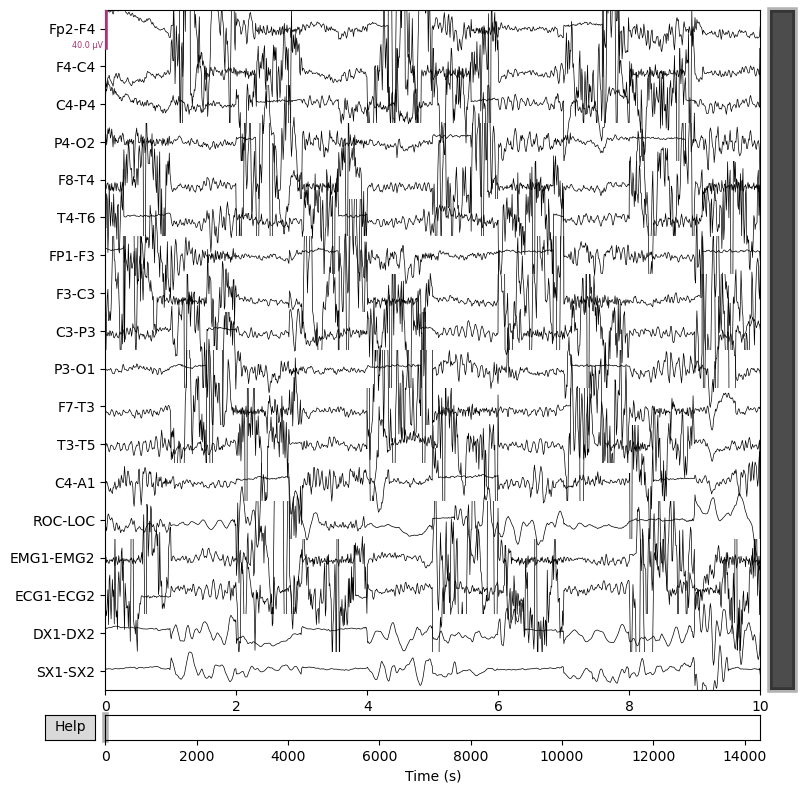

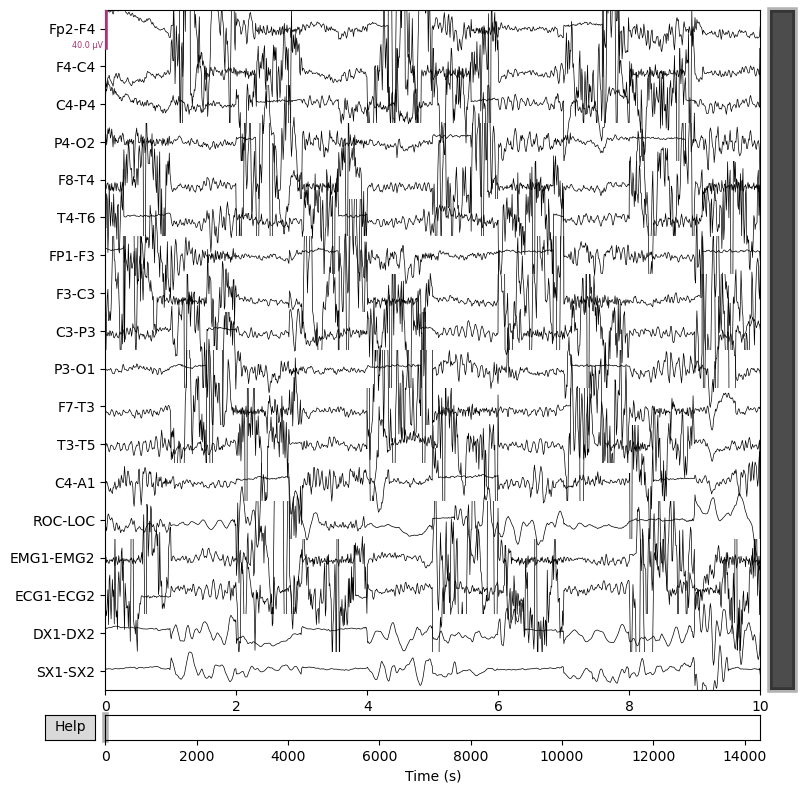

In [ ]:
raw.plot()

## Biblioteca eeglib:

Submódulos e Funcionalidades:

- features: Contém um conjunto de funções para calcular as características incluídas na biblioteca.

- eeg: Define uma estrutura de dados projetada para armazenar fragmentos de dados de sinais EEG e aplicar diferentes tipos de processamento incluídos no submódulo features.

- helpers: Contém classes auxiliares que permitem carregar dados e iterar sobre os dados usando janelas deslizantes. Estas são instâncias das estruturas de dados definidas no submódulo eeg.

- wrapper: Envolvem um auxiliar para extrair um conjunto de características.

In [ ]:
from eeglib import Class

helper = CSVHelper('csv')

for eeg in helper:
    print(eeg.PFD())

ModuleNotFoundError: No module named 'sklearn'